#### Logistic Regression - Model

In [216]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [217]:
#Loading the transformed and standardized Data
data = pd.read_csv(r"C:\HOME\SJSU\Solar_Data\solar_data_transformed18.csv")

In [218]:
#Selecting the features and defining the target features
X = data.drop(columns=['InstallType', 'ID'])
y = data['InstallType']

PCA has not been applied (as it does not have high variance as per the dataset). One of the team member has explained it in  Project_PCA_RF_DT_FeatureImportance.ipynb notebook.

In [219]:
#Splitting the data into Train and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [220]:
#Training the Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [221]:
#Predictions
y_pred = logistic_model.predict(X_test)

In [222]:
#evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8024691358024691

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       647
           1       0.78      0.78      0.78       416
           2       0.75      0.78      0.76       557

    accuracy                           0.80      1620
   macro avg       0.80      0.80      0.80      1620
weighted avg       0.80      0.80      0.80      1620


Confusion Matrix for Logistic Regression:
[[543  27  77]
 [ 27 325  64]
 [ 61  64 432]]


#### Hyperparameter Tuning for Logistic Regression

In [223]:
#Defining the hyperparameter grid for Logistic Regression
param_grid = {
    'solver': ['liblinear', 'saga'], 
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1, 10, 100],  #Regularization
    'class_weight': [None, 'balanced'] 
}

#Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    #5-fold cross-validation
    cv=5,  
    verbose=1,
    n_jobs=-1 
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [224]:
#Best parameters and model performance
print("Best Parameters:", grid_search.best_params_)
#print("\nBest Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [225]:
#predictions
logistic_model = grid_search.best_estimator_
y_pred = logistic_model.predict(X_test)

#### Model Evaluation: Logistic Regression

In [226]:
#accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8074074074074075


In [227]:
#precision
from sklearn.metrics import precision_score
print("\nPrecision (Macro):", precision_score(y_test, y_pred, average='macro'))


Precision (Macro): 0.8024217772912531


In [228]:
#Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report for Logistic Regression Model(After Tuning):\n", classification_report(y_test, y_pred))


Classification Report for Logistic Regression Model(After Tuning):
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       647
           1       0.77      0.83      0.80       416
           2       0.77      0.76      0.77       557

    accuracy                           0.81      1620
   macro avg       0.80      0.81      0.80      1620
weighted avg       0.81      0.81      0.81      1620



In [229]:
from sklearn.metrics import recall_score
print("\nRecall (Macro):", recall_score(y_test, y_pred, average='macro'))


Recall (Macro): 0.8078744943624522


In [230]:
from sklearn.metrics import f1_score
print("\nF1-Score (Macro):", f1_score(y_test, y_pred, average='macro'))


F1-Score (Macro): 0.8046425244630365


In [231]:
from sklearn.metrics import matthews_corrcoef
print("\nMatthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient: 0.7080813568574619


In [232]:
from sklearn.metrics import jaccard_score
print("\nJaccard Score (Macro):", jaccard_score(y_test, y_pred, average='macro'))


Jaccard Score (Macro): 0.6744738143077572


In [233]:
from sklearn.metrics import balanced_accuracy_score
print("\nBalanced Accuracy:", balanced_accuracy_score(y_test, y_pred))


Balanced Accuracy: 0.8078744943624522


In [234]:
from sklearn.metrics import log_loss

#probabilities for all classes
y_prob = logistic_model.predict_proba(X_test)

#Passing the true labels explicitly
unique_classes = logistic_model.classes_
print("Log Loss:", log_loss(y_test, y_prob, labels=unique_classes))

#y_prob = logistic_model.predict_proba(X_test)[:, 1]

Log Loss: 0.5569385872010516


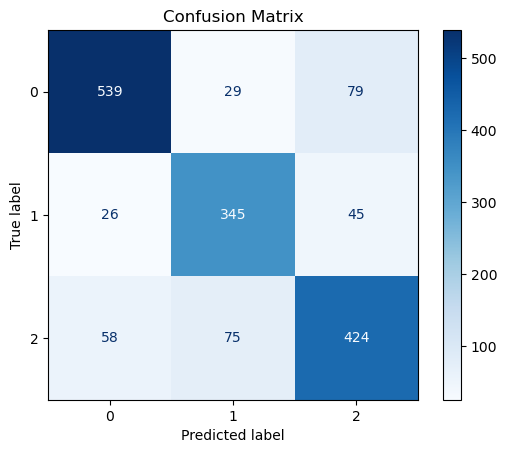

In [235]:
from sklearn.metrics import ConfusionMatrixDisplay
#Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

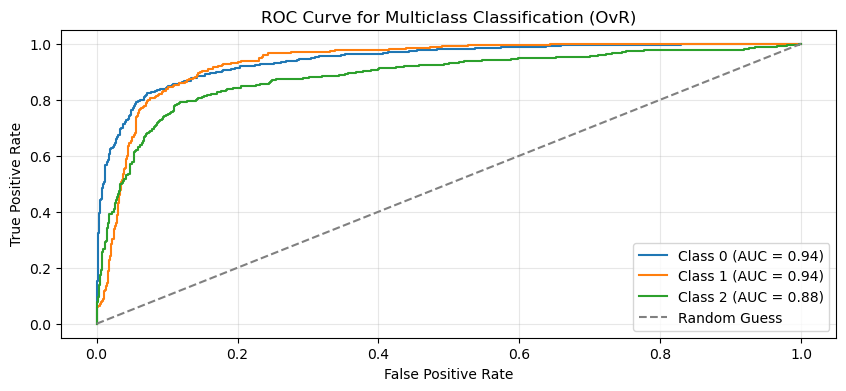

In [236]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

#Ensuring classes are correctly labeled and binarized
n_classes = len(logistic_model.classes_)
y_test_bin = label_binarize(y_test, classes=logistic_model.classes_)

#Ensuring probabilities are available for all classes
y_prob = logistic_model.predict_proba(X_test)

#Plotting the ROC Curve for each class
plt.figure(figsize=(10, 4))
for i in range(n_classes):
     #Computing FPR and TPR
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) 
    roc_auc = auc(fpr, tpr)
     #Computing AUC
    plt.plot(fpr, tpr, label=f"Class {logistic_model.classes_[i]} (AUC = {roc_auc:.2f})")

#Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

plt.title("ROC Curve for Multiclass Classification (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [237]:
from sklearn.metrics import roc_auc_score

#Getting the probabilities for all classes
y_prob = logistic_model.predict_proba(X_test)  

#Use roc_auc_score with 'ovr' or 'ovo' for multiclass
print("ROC-AUC Score (OVR):", roc_auc_score(y_test, y_prob, multi_class='ovr'))
print("ROC-AUC Score (OVO):", roc_auc_score(y_test, y_prob, multi_class='ovo'))

ROC-AUC Score (OVR): 0.9204505204668116
ROC-AUC Score (OVO): 0.9188155706588383


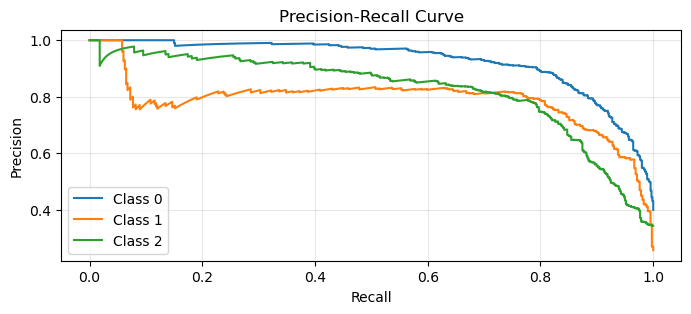

In [238]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Binarize the true labels
n_classes = len(np.unique(y_test))  # Number of unique classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Ensure binary format

#Confirm the shape of y_prob
y_prob = best_model.predict_proba(X_test)  # Probabilities for all classes

#Plotting the Precision-Recall Curve for each class
plt.figure(figsize=(8, 3))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
    
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


In [239]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.2772
